In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,timedelta
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

Question 1&2

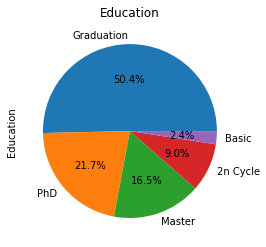

Education         object
Marital_Status    object
dtype: object


In [2]:
data = pd.read_csv('marketing_campaign.csv',delimiter= '\t') #Read the csv with the tab delimiter.
df = pd.DataFrame(data) #create a dataframe based on the data of the csv file

df.dropna(inplace=True) #Drop all the null values in the dataframe
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y') #convert DT_Customer column to datetime objects

#Create a pie chart for the education column
Education = df['Education'].value_counts() #Get the percentages for each unique value in the education column
Education.plot.pie(title='Education', autopct='%1.1f%%') #a simple pie chart to show the percentages calculated above
plt.show()

print(df.dtypes[df.dtypes == 'object']) #print all dtype objects in the dataframe
                                        #The education and marital status are converted to arithmetic values at the question 7 section


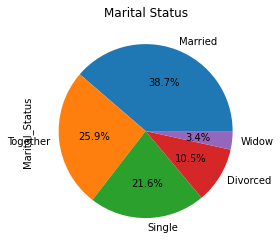

['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [3]:
df.loc[(df['Marital_Status'] == 'YOLO') |  #if marital status is YOLO
       (df['Marital_Status'] == 'Absurd') |#or Absurd
       (df['Marital_Status'] == 'Alone'),'Marital_Status'] = 'Single' #or Alone ,make them equal to Single

MaritalStatus = df['Marital_Status'].value_counts() #Get the percentages for each unique word in the marital status column
MaritalStatus.plot.pie(title='Marital Status', autopct='%1.1f%%') #simple pie chart to show the percentages calculated above
plt.show()

print(df['Marital_Status'].unique()) #print all the unique words in the marital status column
                                     #Marital Status column is converted to arithmetic values at the question 7

Question 3

In [4]:
df['Customer_For'] = pd.to_datetime(date.today()) #Get the current date as a datetime object
                                                  #and create a column with the current date at each row
df['Customer_For'] = df['Customer_For'] - pd.to_timedelta(df['Recency'],unit='D') #Subtract from the current date
                                                                                  #The number of days since the customer's last visit
df['Customer_For'] = df['Customer_For'] - df['Dt_Customer'] #Subtract from the calculated date above,the date of the
                                                            #Customer's first visit
df['Age'] = date.today().year - df['Year_Birth'] #Subtract from the current Year the Birth year of each customer

df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntGoldProds'] #Calculate the amount of money spent by the customer
                                                                                                                    #in the last 2 years
df['Children'] = df['Kidhome'] + df['Teenhome'] #Get the total number of children in each family

df['Family_Size'] = df['Marital_Status'].apply(lambda x: 2 if (x == 'Married') | (x == 'Together') else 1) #apply a simple lambda function that checks if a customer
                                                                                                           #is married or together with another person ,so it increments family size by 2
                                                                                                           #else by 1
df['Family_Size'] += df['Children'] #Lastly increment the family size by the number of children in each family

df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x >=1 else 0) #For a customer to be a parent ,he needs to have at least 1 child

df['Living_With'] = df['Marital_Status'].apply(lambda x: 'Partner' if (x == 'Married') | (x == 'Together') else 'Alone') #check if a customer is married or together so he has a partner
                                                                                                                         #else he is alone
def Age_Sort(x): #Simple function to calculate based on age
    if x <= 30:  #the age groups of the customers
        return '21-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    elif x <= 80:
        return '71-80'
    else:
        return '>80'
    
df['Age_Group'] = df['Age'].apply(Age_Sort) #apply the above function to the age column in order to create the age group column

Question 4

In [5]:
def zscore(col): #Subtract from the column the mean of the column
    return (col - np.mean(col)) / np.std(col) #and divide that by the standard deviation of the column

z_scores = zscore(df['Year_Birth']) #Calculate the z scores for the year birth column
df =  df[(z_scores <= 3) & (z_scores >= -3)] #Exclude the extreme values

z_scores = zscore(df['Income']) #Calculate the z scores for the income column
df =  df[(z_scores <= 3) & (z_scores >= -3)] #Exclude the extreme values

z_scores = zscore(df['Spent']) #Calculate z scores for the Spent column
df =  df[(z_scores <= 3) & (z_scores >= -3)] #Exclude the extreme values

z_scores = zscore(df['NumDealsPurchases']) #Calculate z scores for the Num Deals Purchases Column
df =  df[(z_scores <= 3) & (z_scores >= -3)] #Exclude the extreme values

#The columns selected above are the ones with the biggest probability to have extreme values
#as most of the others have only values of expressions or their arithmetic equal (0 or 1 for 2 expressions).

Question 5

<AxesSubplot:>

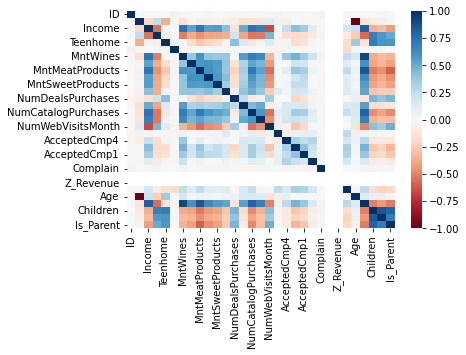

In [6]:
sns.heatmap(df.corr(),cmap='RdBu') #Use .corr() to get the correlations between the columns of Dataframe 
                                   #and then use seaborn.heatmap to illustrate it in a red-blue spectrum 2d heatmap

Question 6

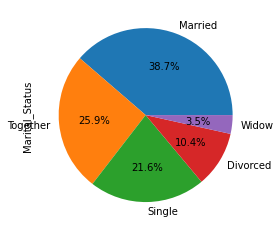

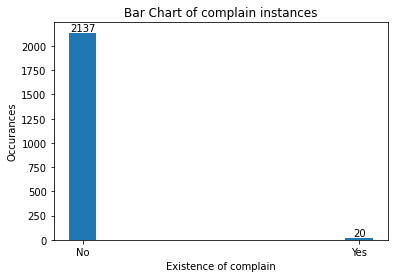

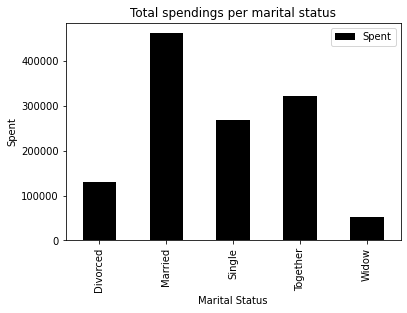

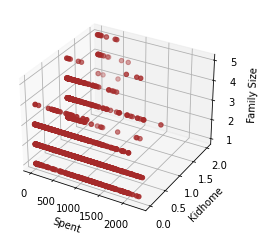

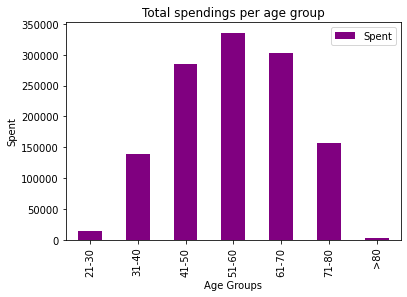

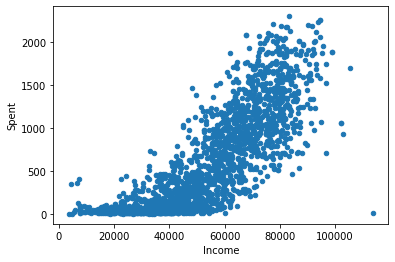

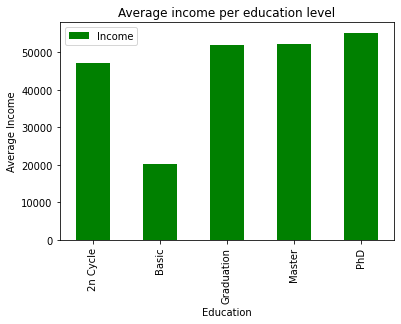

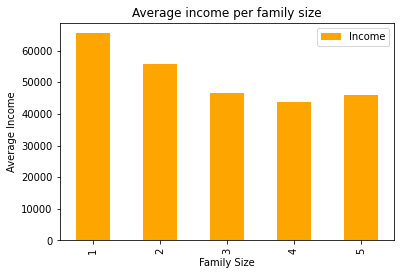

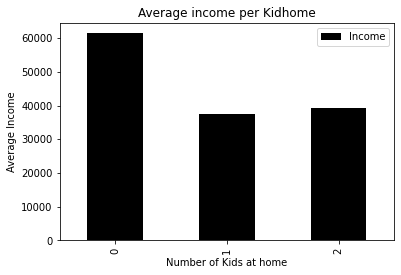

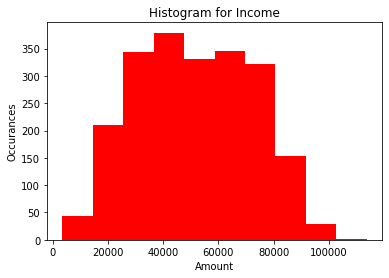

In [7]:
#1st graph (6.1 Question)
counts = df['Marital_Status'].value_counts() #count the number of occurrences of each category in the Marital Status column
counts.plot.pie(autopct='%1.1f%%')
plt.show()                                  #display the pie chart and observe the highest percentage of marital status

#2nd graph  (6.2 Question)
counts = df['Complain'].value_counts()  #count values in Complain column for each value
labels_dict = {1 : 'Yes', 0 : 'No'} # dictionary to map 1 as yes and 0 as no
new_labels = counts.index.map(labels_dict) #map the percentages

fig,ax = plt.subplots()
ax.bar(new_labels, counts.values, width=0.1) #add as labels the yes and no
ax.set_title('Bar Chart of complain instances')
ax.set_xlabel('Existence of complain')
ax.set_ylabel('Occurances')

for i, v in enumerate(counts.values):   #display the actual amounts into the pie
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()    #display the bar chart and observe above the bar the total occurances of clients with a complain and those without it.

#3rd graph  (6.3 Question)
newdf = df[['Marital_Status', 'Spent']]   #get the columns that are gonna be analyzed
newdf = newdf.groupby('Marital_Status').sum()   #group the data by Family Size and compute the sum of income for each size 

newdf.plot(kind='bar',color='black')

plt.xlabel('Marital Status')
plt.ylabel('Spent')
plt.title('Total spendings per marital status')
plt.show()

#4th graph  (6.4 Question)
fig = plt.figure()  #create a 3D axis
ax = plt.axes(projection='3d')

ax.scatter(df['Spent'], df['Kidhome'], df['Family_Size'],color='brown') #represent the data of the three columns in a scatter plot
ax.set_xlabel('Spent')
ax.set_ylabel('Kidhome')
ax.set_zlabel('Family Size')
plt.show() #display the scatter 3d chart and observe the frequency of bigger size of families spending less and less.

#5th graph (6.5 Question)
newdf = df[['Age_Group', 'Spent']]    #get the columns that are gonna be analyzed
newdf = newdf.groupby('Age_Group').sum()    #group the data by Age Groups and compute the sum of spendings for each age-group 

newdf.plot(kind='bar',color='purple')
plt.xlabel('Age Groups')
plt.ylabel('Spent')
plt.title('Total spendings per age group')
plt.show()

#6th graph (6.6 Question)
df.plot.scatter(x='Income', y='Spent',s=20) #Show the values between the two columns we want to analyze in a scatter plot

#7th graph (6.7 Question)
newdf = df[['Education', 'Income']] #get the columns that are gonna be analyzed
newdf = newdf.groupby('Education').mean() #group the data by education category and compute the mean income of each category

newdf.plot(kind='bar', color='green')
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.title('Average income per education level')
plt.show()

#8th graph (6.8 Question)
newdf = df[['Family_Size', 'Income']]   #get the columns that are gonna be analyzed
newdf = newdf.groupby('Family_Size').mean() #group the data by family size  and compute the mean income of each size

newdf.plot(kind='bar',color='orange')
plt.xlabel('Family Size')
plt.ylabel('Average Income')
plt.title('Average income per family size')
plt.show()

#9th graph (6.9 Question)
newdf = df[['Kidhome', 'Income']] #get the columns that are gonna be analyzed
newdf = newdf.groupby('Kidhome').mean() #group the data by numbers of kids in house and compute the mean income of each size

newdf.plot(kind='bar',color='black')
plt.xlabel('Number of Kids at home')
plt.ylabel('Average Income')
plt.title('Average income per Kidhome')
plt.show()

#10th graph (6.15 Question)
plt.hist(df['Income'],color='red')  #show the data income of dataframe in a histogram
plt.title('Histogram for Income')
plt.xlabel('Amount')
plt.ylabel('Occurances')
plt.show()

Question 7

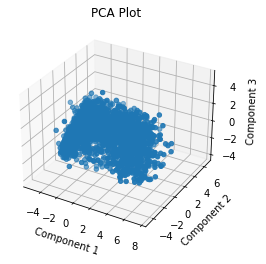

In [8]:
encoder = LabelEncoder() #Initialize the Label Encoder

encoder.fit(df['Living_With']) #add the Living with column
df['Living_With'] = encoder.transform(df['Living_With']) #and transform it

encoder.fit(df['Marital_Status']) #fit the marital status column
df['Marital_Status'] = encoder.transform(df['Marital_Status']) #tranform it to arithmetic values

encoder.fit(df['Education']) #fit the education column
df['Education'] = encoder.transform(df['Education']) #tranform it to arithmetic values

new_df = df.copy() #copy the dataframe

new_df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response',
           'Dt_Customer','Age_Group','Customer_For'],axis=1,inplace=True) #delete the non useful columns

df_columns = new_df.columns #store the columns of the dataframe 

scaler = StandardScaler() #initialize standard scaler
scaler.fit(new_df) #fit the dataframe
new_df = scaler.transform(new_df) #Standardize the dataframe

new_df = pd.DataFrame(new_df,columns=df_columns) #make the transformed array a dataframe once again with the column names above

pca = PCA(n_components=3) #initialize principal component analysis with 3 components

new_df = pca.fit_transform(new_df) #fit and transform the dataframe

fig = plt.figure() #initialize the scatter plot
colors = ['red', 'green', 'blue'] #set colors

ax = fig.add_subplot(111, projection='3d') #set the plot to be 3D

ax.scatter(new_df[:, 0], new_df[:, 1], new_df[:, 2]) #scatter the data based on the axis
ax.set_xlabel('Component 1') #set the axis labels
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('PCA Plot') #set title
plt.show()

Question 8

ELBOW

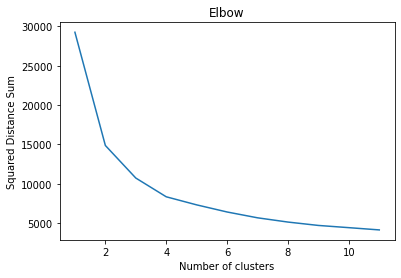

In [9]:
df2 = new_df.copy() #Get a copy of the dataframe for the Agglomerative method since the Kmeans method will change the values of the dataframe
list = []
for k in range(1,12): #check for various cluster values ranging from 1 to 12
    kmeans = KMeans(n_clusters=k) #use the kmeans method for the various cluster values
    kmeans.fit(new_df) #fit the dataframe
    list.append(kmeans.inertia_) #append the squared distance to the list

plt.plot(range(1, 12), list) #create the plot for the values of clusters and the distances
plt.title('Elbow') #set title
plt.xlabel('Number of clusters') #set labels
plt.ylabel('Squared Distance Sum')
plt.show() #show the plot


K-Means Clustering

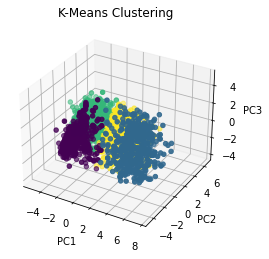

In [10]:
kmeans = KMeans(n_clusters=4) #using the ELBOW method we can see the optimal number of clusters is 4
kmeans.fit_predict(new_df) #fit and predict the new model
labels = kmeans.labels_ #get the cluster labels

fig = plt.figure() #initialize the plot

ax = fig.add_subplot(111, projection='3d') #set the projection to be 3D

scatter = ax.scatter(new_df[:, 0], new_df[:, 1], new_df[:, 2], c=labels) #scatter the data and set colors based on the kmeans
                                                                         
ax.set_xlabel('PC1') #set the axis labels
ax.set_ylabel('PC2') #for each dimension
ax.set_zlabel('PC3')
plt.title('K-Means Clustering') #set title
plt.show()

Agglomerative Clustering

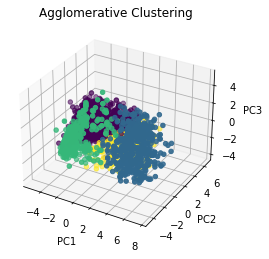

In [11]:
agg_clustering = AgglomerativeClustering(n_clusters=4) #initialize Agglomerative clustering with 4 clusters
agg_labels = agg_clustering.fit_predict(df2) #fit and predict the new model

fig = plt.figure() #initialize the plot
ax = fig.add_subplot(111, projection='3d') #set the projection to 3D

ax.scatter(df2[:, 0],df2[:, 1],df2[:, 2], c=agg_labels) #scatter the data and set the colors based on the labels by the agglomerative clustering

plt.title('Agglomerative Clustering') #set title
ax.set_xlabel('PC1') #set labels
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()